In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
train = pd.read_csv("SalaryData_Train.csv")
test = pd.read_csv("SalaryData_Test.csv")

In [25]:
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)

In [26]:
df

age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
45216   33            Private   Bachelors           13        Never-married   
45217   39            Private   Bachelors           13             Divorced   
45218   38            Private   Bachelors           13   Married-civ-spouse   
45219   44            Private   Bachelors           13             Divorced   
45220   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
45216      Prof-specialty       Own-child                White     Male   
45217      Prof-specialty   Not-in-family                White   Female   
45218      Prof-specialty         Husband                White     Male   
45219        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
45220     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0             2174            0            40   United-States   <=50K  
1                0            0            13   United-States   <=50K  
2                0            0            40   United-States   <=50K  
3                0            0            40   United-States   <=50K  
4                0            0            40            Cuba   <=50K  
...            ...          ...           ...             ...     ...  
45216            0            0            40   United-States   <=50K  
45217            0            0            36   United-States   <=50K  
45218            0            0            50   United-States   <=50K  
45219         5455            0            40   United-States   <=50K  
45220            0            0            60   United-States    >50K  

[45221 rows x 14 columns]

In [27]:
mapping = {' >50K': 1, ' <=50K': 2}
df = df.replace({'Salary': mapping})


In [28]:
df

age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
45216   33            Private   Bachelors           13        Never-married   
45217   39            Private   Bachelors           13             Divorced   
45218   38            Private   Bachelors           13   Married-civ-spouse   
45219   44            Private   Bachelors           13             Divorced   
45220   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
45216      Prof-specialty       Own-child                White     Male   
45217      Prof-specialty   Not-in-family                White   Female   
45218      Prof-specialty         Husband                White     Male   
45219        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
45220     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0             2174            0            40   United-States       2  
1                0            0            13   United-States       2  
2                0            0            40   United-States       2  
3                0            0            40   United-States       2  
4                0            0            40            Cuba       2  
...            ...          ...           ...             ...     ...  
45216            0            0            40   United-States       2  
45217            0            0            36   United-States       2  
45218            0            0            50   United-States       2  
45219         5455            0            40   United-States       2  
45220            0            0            60   United-States       1  

[45221 rows x 14 columns]

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['maritalstatus'] = le.fit_transform(df['maritalstatus'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native'] = le.fit_transform(df['native'])

In [37]:
df

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
45216   33          2          9           13              4           9   
45217   39          2          9           13              0           9   
45218   38          2          9           13              2           9   
45219   44          2          9           13              0           0   
45220   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1         2174            0            40   
1                 0     4    1            0            0            13   
2                 1     4    1            0            0            40   
3                 0     2    1            0            0            40   
4                 5     2    0            0            0            40   
...             ...   ...  ...          ...          ...           ...   
45216             3     4    1            0            0            40   
45217             1     4    0            0            0            36   
45218             0     4    1            0            0            50   
45219             3     1    1         5455            0            40   
45220             0     4    1            0            0            60   

       native  Salary  
0          37       2  
1          37       2  
2          37       2  
3          37       2  
4           4       2  
...       ...     ...  
45216      37       2  
45217      37       2  
45218      37       2  
45219      37       2  
45220      37       1  

[45221 rows x 14 columns]

### Visualization

<AxesSubplot:>

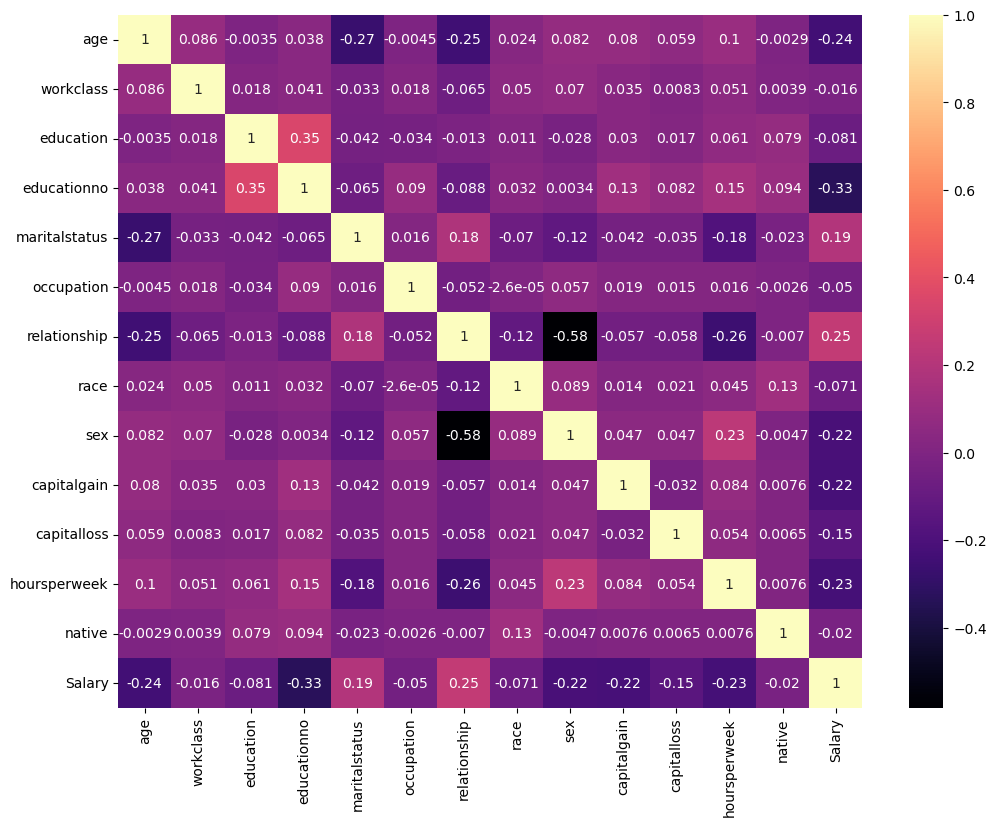

In [44]:
plt.figure(figsize=(12,9))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='magma')

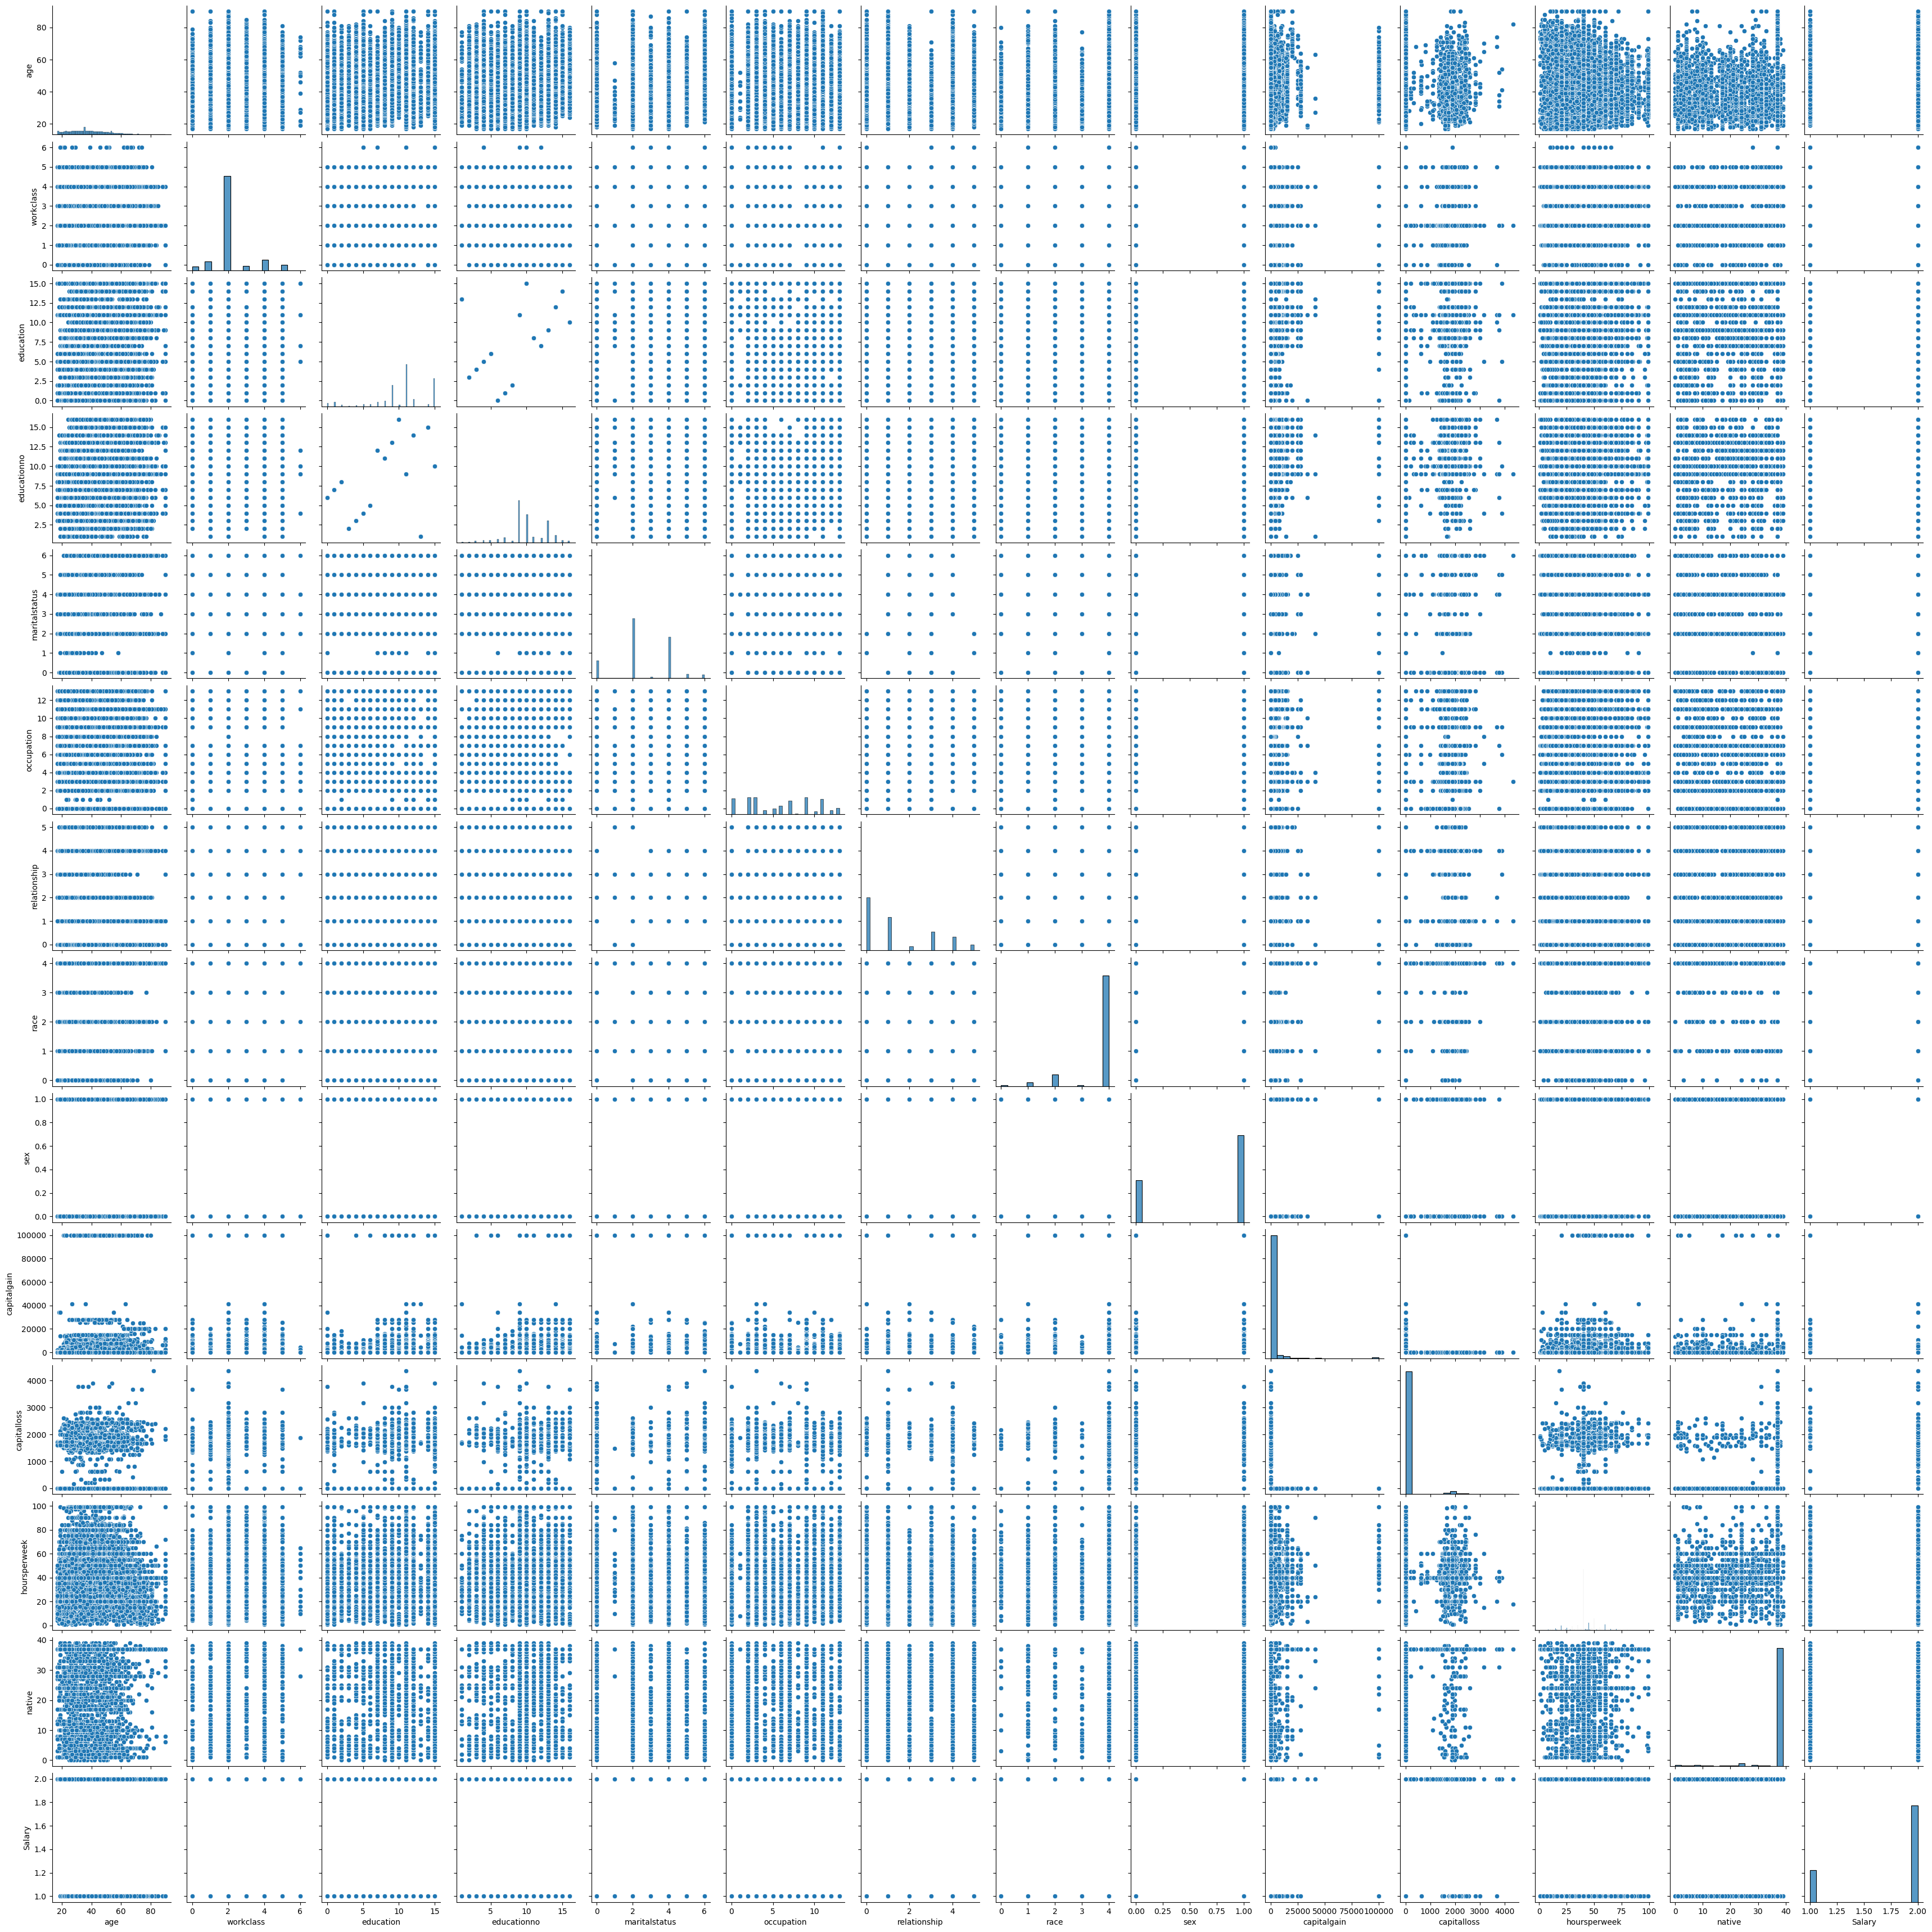

In [45]:
sns.pairplot(df, palette="coolwarm")

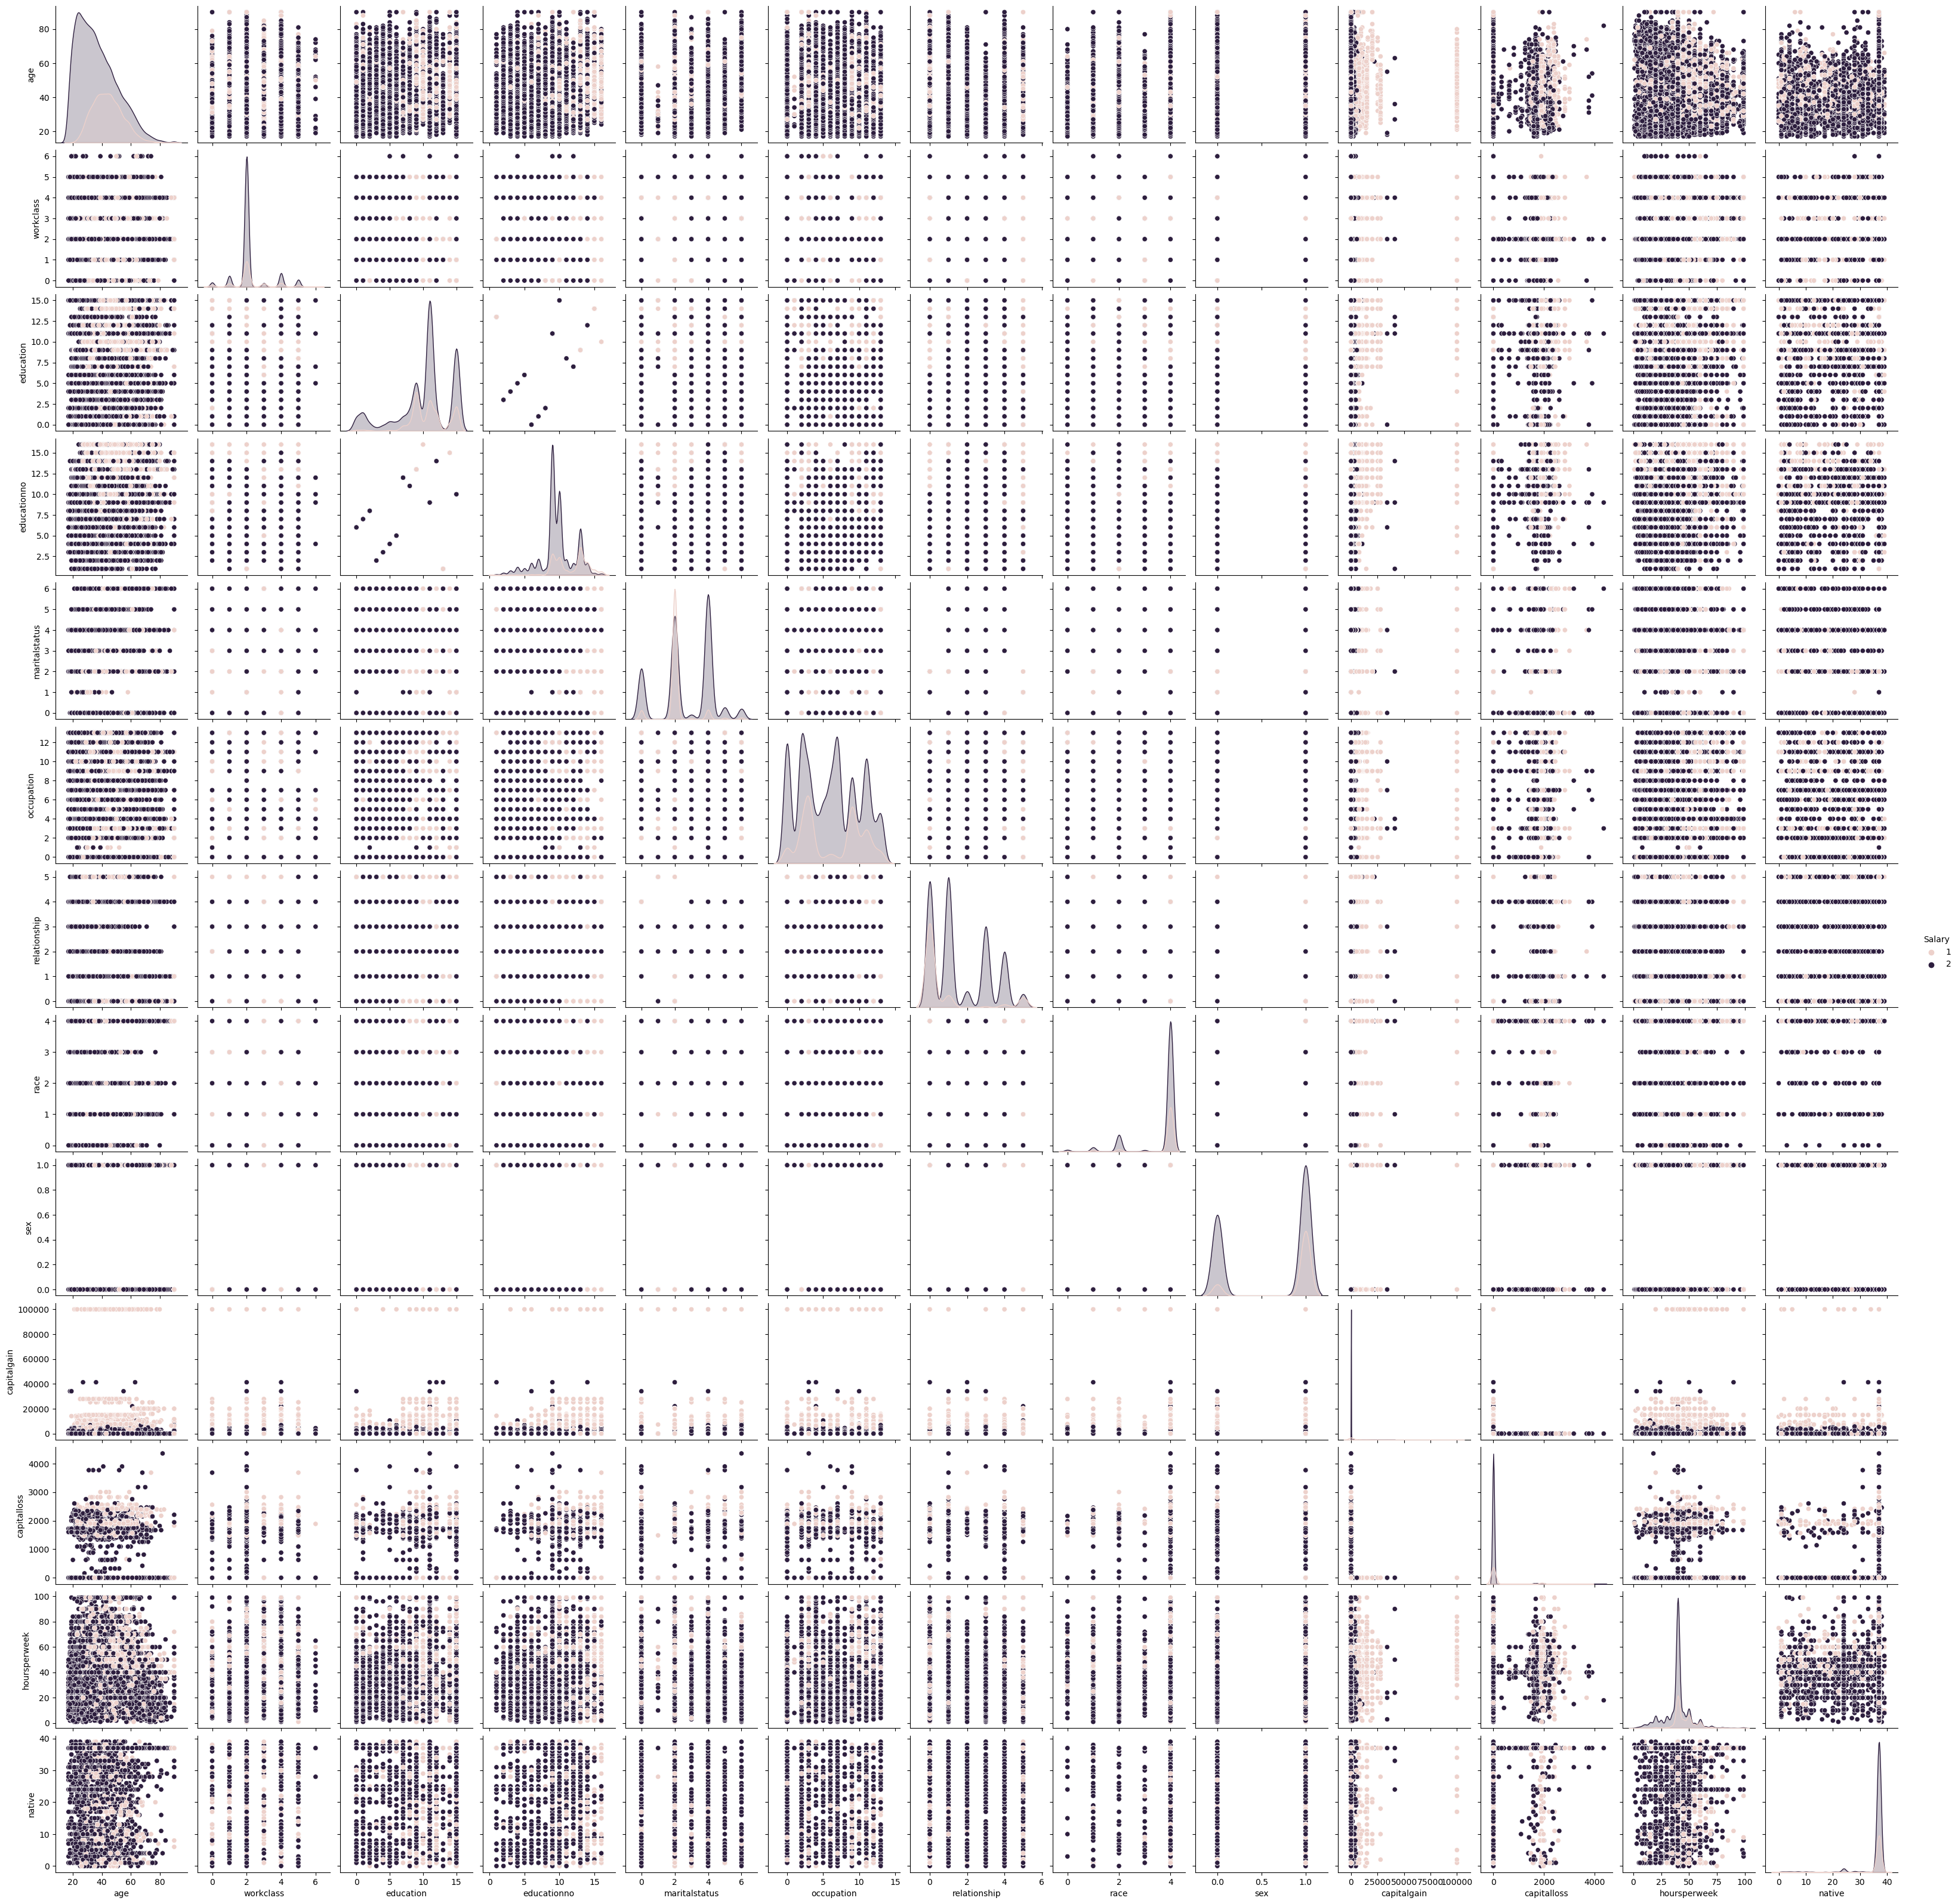

In [46]:
sns.pairplot(df, hue="Salary")

## Naive Bayes

In [68]:
y = df['Salary']
X = df.drop('Salary',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=2)

### GaussianNB

In [69]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [70]:
pred1 = gb.predict(X_test)
pred1

array([1, 2, 2, ..., 2, 2, 2])

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, pred1)

0.7875304001768737

In [74]:
confusion_matrix(y_test, pred1)


array([[ 344,  799],
       [ 162, 3218]])

### MultinomialNB

In [75]:
from sklearn.naive_bayes import MultinomialNB
mm = MultinomialNB()
mm.fit(X_train,y_train)

MultinomialNB()

In [76]:
pred2 = mm.predict(X_test)

In [77]:
pred2

array([2, 2, 2, ..., 2, 2, 2])

In [78]:
accuracy_score(pred2,y_test)

0.7667477338049967

In [79]:
confusion_matrix(pred2,y_test)

array([[ 226,  138],
       [ 917, 3242]])